In [27]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# read cik.csv
cik_df = pd.read_csv('../cik.csv')
cik_df.shape

(503, 1)

In [29]:
cik_df.head()

,CIK
0,66740
1,91142
2,1800
3,1551152
4,1467373


In [30]:
# Load the JSON file
with open('../datasets/EXTRACTED_FILINGS.json', 'r') as json_file:
    data = json.load(json_file)
extracted_filings = pd.DataFrame(data)

In [31]:
extracted_filings['cik'] = extracted_filings['cik'].astype(int)
cik_df['CIK'] = cik_df['CIK'].astype(int)

In [32]:
# compare the list of cik in cik.csv and extracted_filings and print out the ones that are not in the extracted_filings
cik_df[~cik_df['CIK'].isin(extracted_filings['cik'])]

,CIK
115,831001
215,1932393
274,1944048


In [33]:
extracted_filings.head()

,cik,company,year,item_1A,item_7,item_7A
0,1000228,SCHEIN HENRY INC,2005,The healthcare products distribution industry ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."
1,1000228,HENRY SCHEIN INC,2006,The healthcare products distribution industry ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."
2,1000228,HENRY SCHEIN INC,2007,The healthcare products distribution industry ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."
3,1000228,HENRY SCHEIN INC,2008,Declining economic conditions could adversely ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."
4,1000228,HENRY SCHEIN INC,2009,Declining economic conditions could adversely ...,Cautionary Note Regarding Forward-Looking Stat...,"We are exposed to market risks, which include ..."


Text(0.5, 1.0, 'Distribution of Filings in Years')

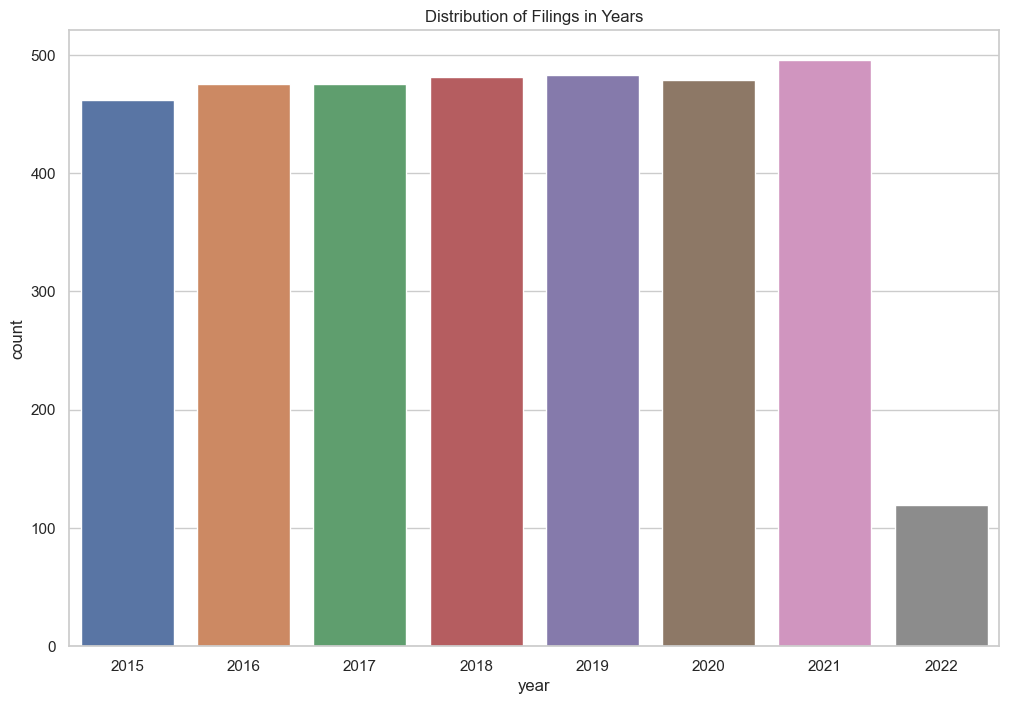

In [34]:
# Plot the distribution of filings in years 2015-2022
extracted_filings['year'] = extracted_filings['year'].astype(int)
df_2015 = extracted_filings[extracted_filings['year'] >= 2015]
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.countplot(x='year', data=df_2015)
plt.title('Distribution of Filings in Years')

# ANALYSIS OF EXTRACTED FLS WITH METRICS

In [35]:
# Load the JSON file
with open('../datasets/EXTRACTED_FLS_METRICS.json', 'r') as json_file:
    data = json.load(json_file)
df = pd.DataFrame(data)

In [36]:
df.head()

,Sentence,Metric,Item,Year,CIK,Company,FLS
0,"In the future, we may be unable to compete suc...",Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
1,Our revenues and profitability depend on our r...,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
2,Our future revenues and profitability depend o...,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
3,We experience fluctuations in quarterly earnings.,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
4,Revenues and profitability generally have been...,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS


In [37]:
# number of companies analyzed
df['CIK'].value_counts()

1099219    3427
1137774    3381
874766     2852
899051     2136
5272       1933
           ... 
1022079      21
1841666      19
36104        13
1868275       9
106535        2
Name: CIK, Length: 490, dtype: int64

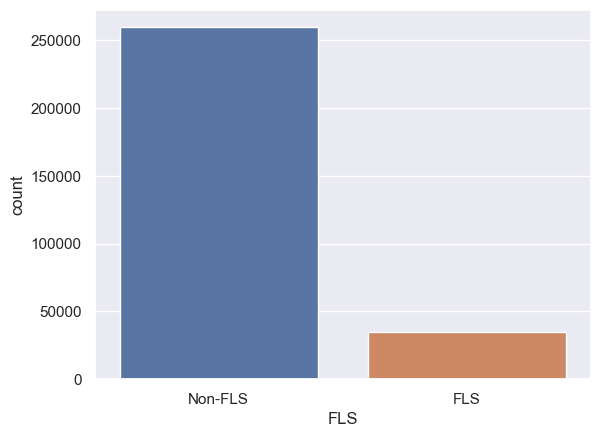

In [38]:
# draw a graph to show the distribution of FLS and non-FLS 
sns.set(style="darkgrid")
ax = sns.countplot(x="FLS", data=df)
plt.show()


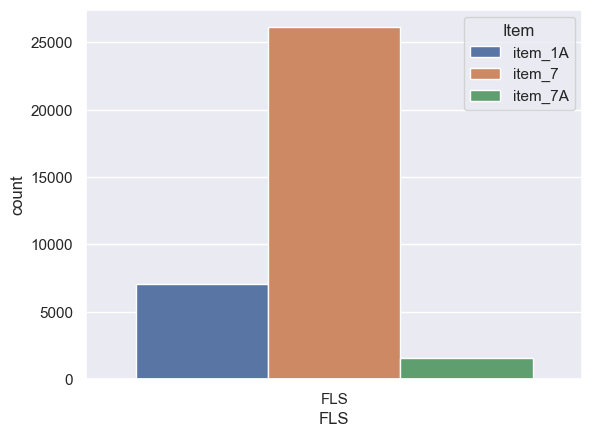

In [46]:
# draw graph to show FLS per item
df_fls = df[df['FLS'] == 'FLS']
sns.set(style="darkgrid")
ax = sns.countplot(x="FLS", hue="Item", data=df_fls)
plt.show()

In [49]:
# number of extracted sentences per metric
df['Metric'].value_counts()

Revenue                  162900
Net Income               109302
EBIT                      16797
EPS                        4729
Cash Flow (Investing)       364
Cash Flow (Financing)       130
Cash Flow (Operating)        32
Name: Metric, dtype: int64

In [51]:
# count number of fls
df['FLS'].value_counts()

Non-FLS    259525
FLS         34729
Name: FLS, dtype: int64

In [52]:
# count number of FLS per item
df_fls = df[df['FLS'] == 'FLS'] 
df_fls[['Item','FLS']].groupby('Item').count()

,FLS
Item,
item_1A,7042
item_7,26120
item_7A,1567


<Axes: xlabel='Metric'>

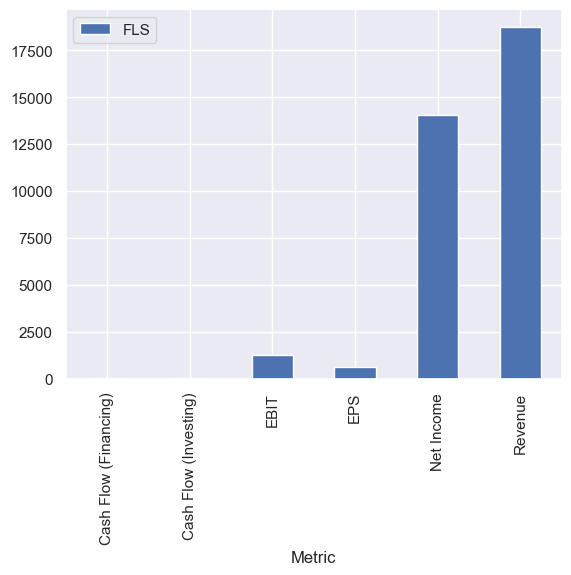

In [54]:
# plot number of fls per metric
df_fls[['Metric','FLS']].groupby('Metric').count().plot(kind='bar')

In [41]:
# plot number of metrics
df['Metric'].value_counts()

Revenue                  162900
Net Income               109302
EBIT                      16797
EPS                        4729
Cash Flow (Investing)       364
Cash Flow (Financing)       130
Cash Flow (Operating)        32
Name: Metric, dtype: int64

In [42]:
ebit = df[df['Metric']=="EBIT"][140:400]
ebit.to_csv('ebit.csv', index=False)

In [43]:
eps = df[df['Metric']=="EPS"][1500:2000]
eps.to_csv('eps.csv', index=False)

In [44]:
df.shape

(294254, 7)

In [45]:
cfo = df[df['Metric']=="Cash Flow (Operating)"]
cfo.reset_index(drop=True, inplace=True)
cfo.to_csv('cfo.csv', index=False)

In [55]:
df_fls.shape

(34729, 7)